In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("concrete.csv")

In [3]:
df.sample(20)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
396,318.8,212.5,0.0,155.7,14.3,852.1,880.4,28,55.50
681,160.2,188.0,146.4,203.2,11.3,828.7,709.7,28,35.31
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
791,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,28,38.20
664,173.0,116.0,0.0,192.0,0.0,946.8,856.8,7,11.39
471,148.0,175.0,0.0,171.0,2.0,1000.0,828.0,28,26.92
327,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,28,32.66
301,277.1,0.0,97.4,160.6,11.8,973.9,875.6,56,51.04
476,439.0,177.0,0.0,186.0,11.1,884.9,707.9,91,73.30
308,290.4,0.0,96.2,168.1,9.4,961.2,865.0,14,34.67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
df.describe(include="all")

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
corr=df.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


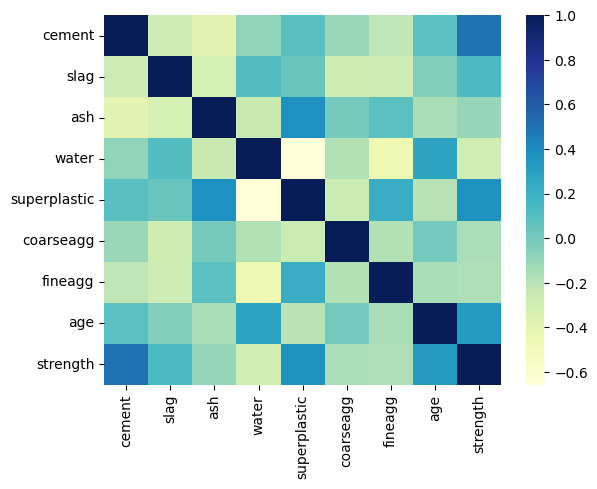

In [12]:
sns.heatmap(corr,cmap="YlGnBu")
plt.show()

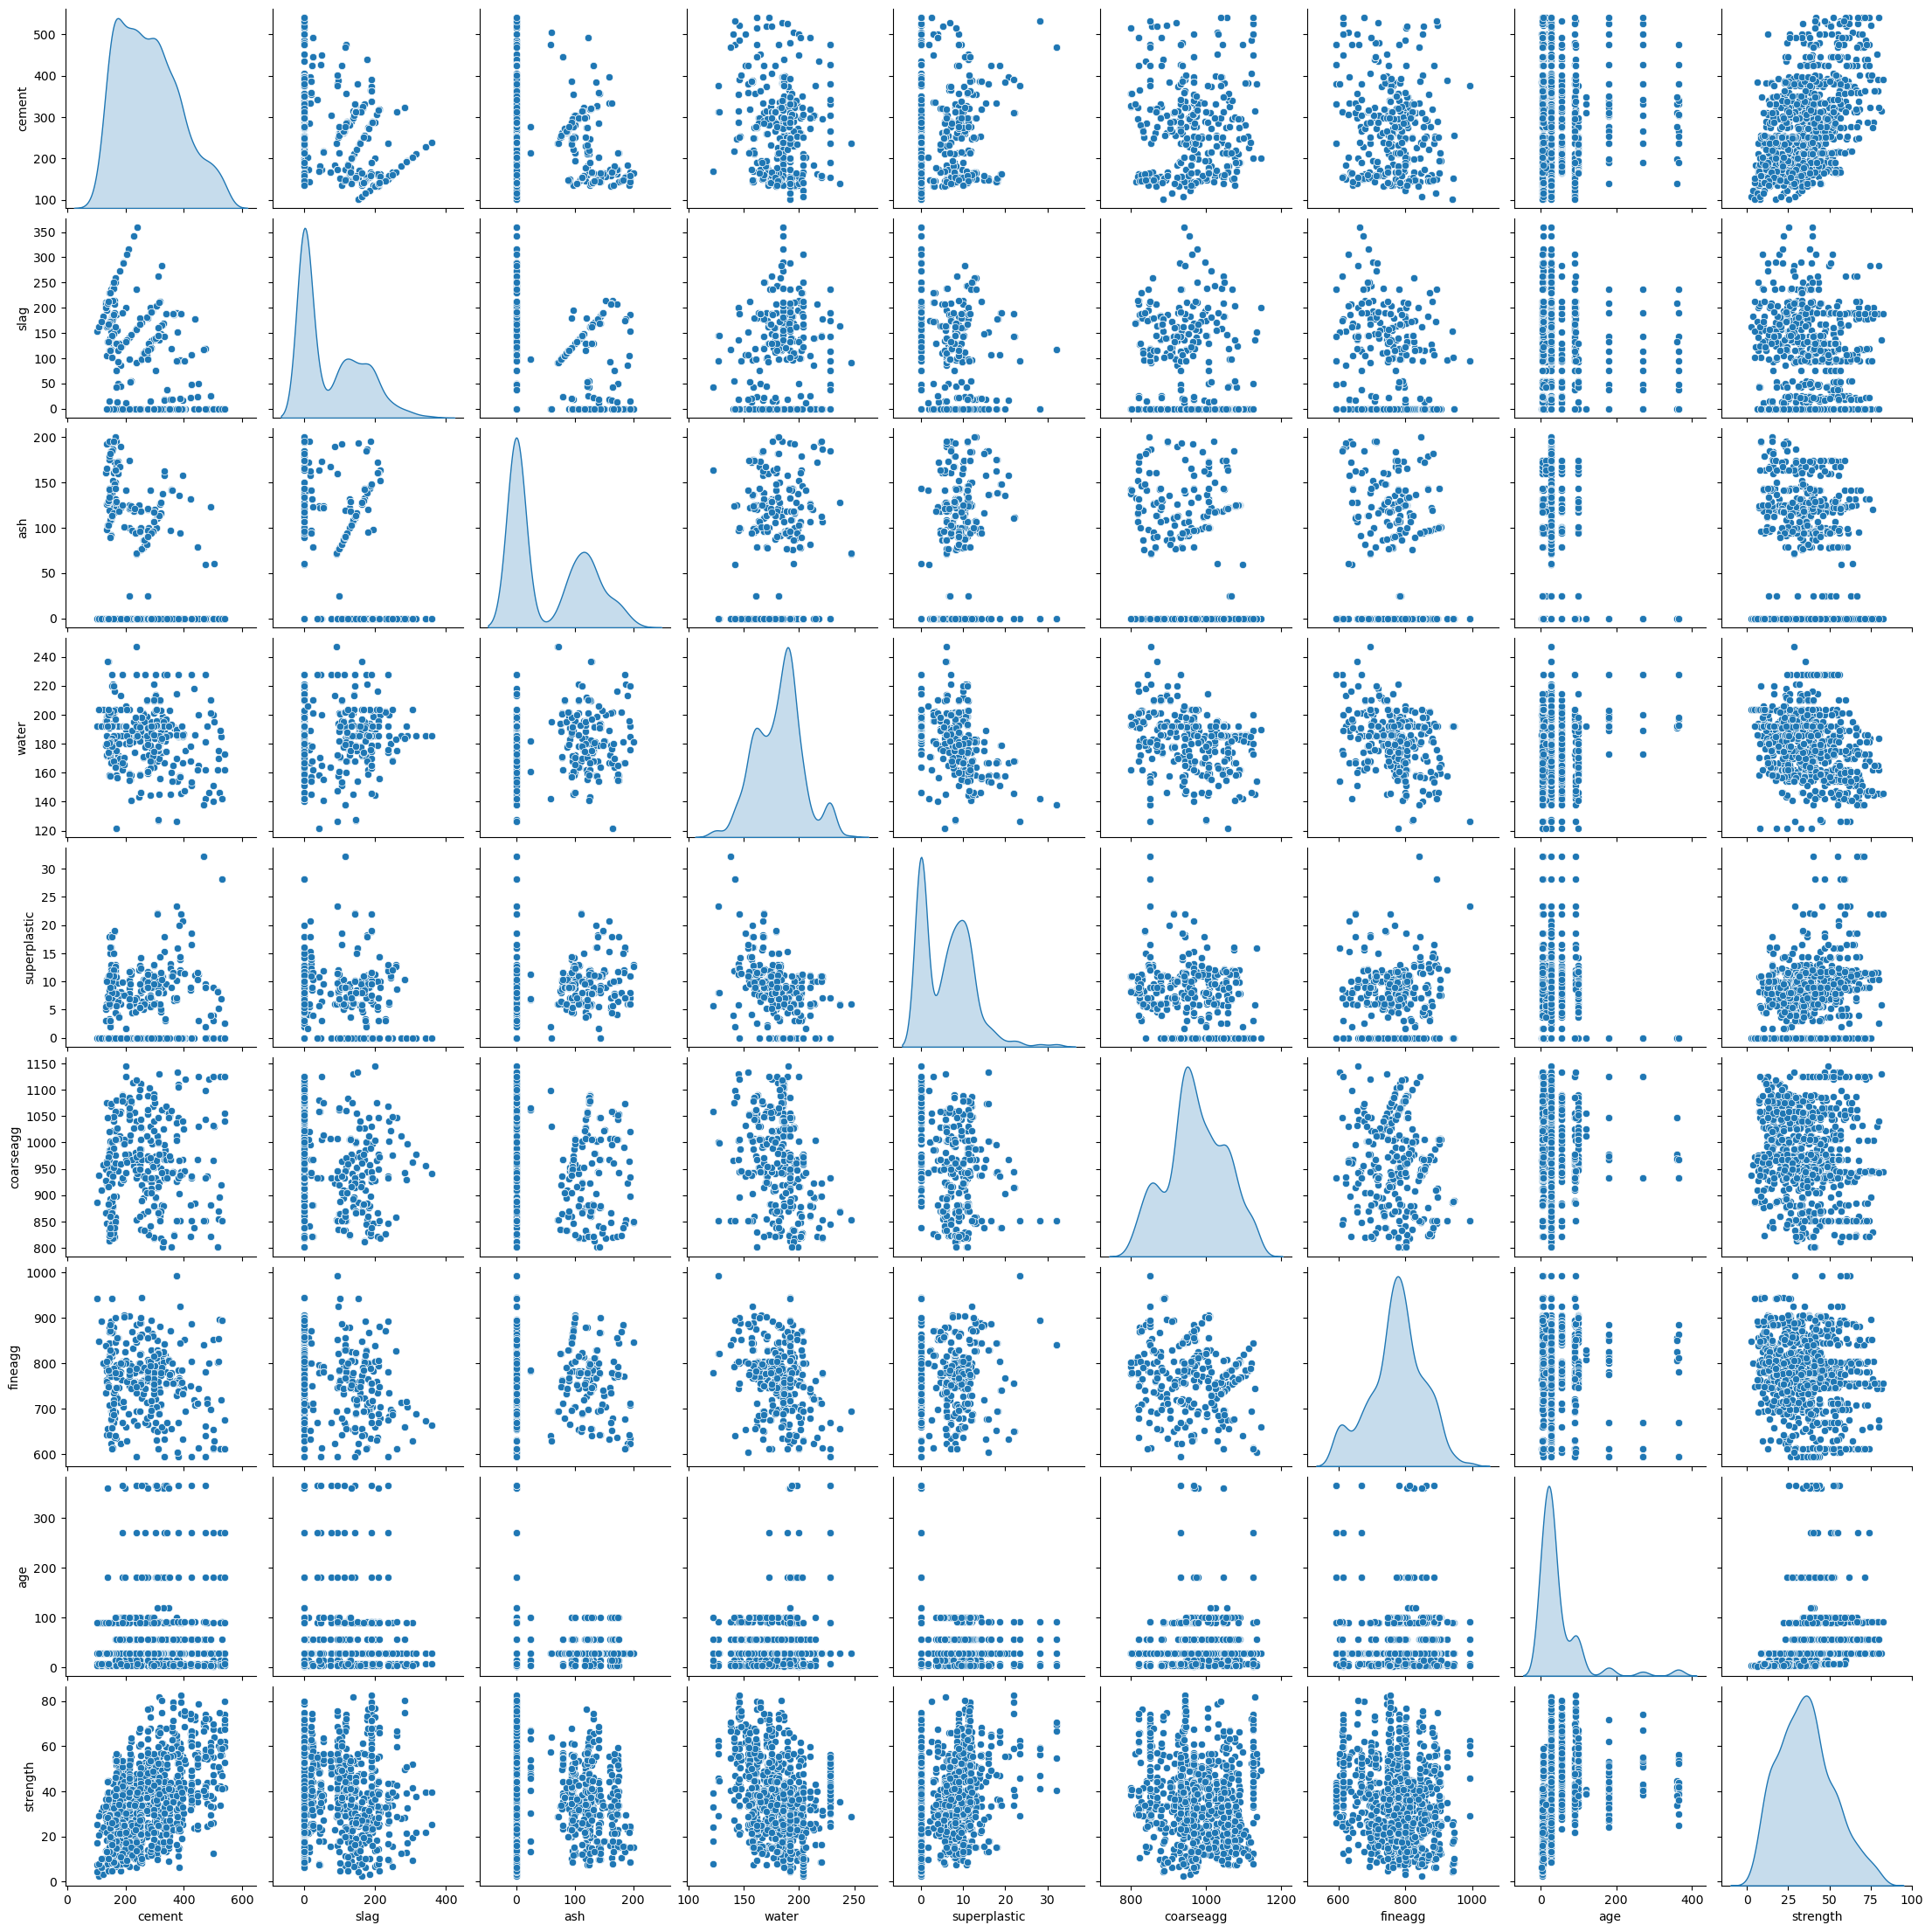

In [7]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [22]:
x= df.drop(['strength'], axis =1)
y = df[['strength']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)
model_1= LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [23]:
model_1.score(x_train,y_train)

0.6143585299535809

In [24]:
model_1.score(x_test,y_test)

0.6142553848332775